In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob
from astropy.io import fits

In [43]:
fnames = glob.glob('/data2/GBT/*/OnOff/*/*B*.fits')
fnames.sort()
print len(fnames)

70


In [44]:
f = fits.open(fnames[6])

In [45]:
hdu = f[1]

In [46]:
data = hdu.data['DATA']

In [47]:
N = 2**14
df = hdu.data['CDELT1'][0]
center_freq = hdu.data['CRVAL1'][0]
centerbin = hdu.data['CRPIX1'][0]
index = np.arange(N)
if_freqs = freqstest = index * (-df) # in Hz
mask = np.ones(N, dtype=bool)
mask[(index % 512) == 0] = False
mask[if_freqs < 150.e6] = False
mask[if_freqs > 1400.e6] = False
freqs = (center_freq + df * (index + 1 - centerbin))[::-1]

In [48]:
print hdu.data['PROCSCAN'][0]

ON


In [49]:
xxoff = data[1::8, ::-1]
xxoff = xxoff[200:, mask]
msdata = xxoff - np.nanmean(xxoff, 0)

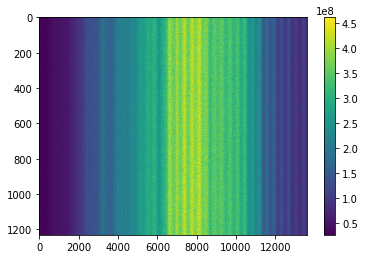

In [50]:
imshow(xxoff, aspect='auto')
colorbar()
#clim(1.e8, 5.e8)

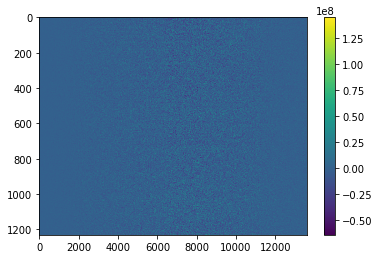

In [51]:
imshow(msdata, aspect='auto')
colorbar()
#clim(-1.e7, 1.e7)

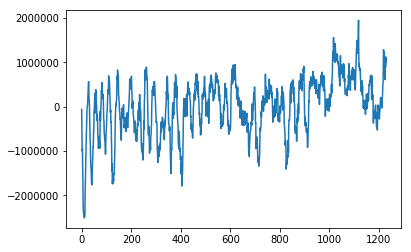

In [52]:
plot(msdata.mean(1))

In [80]:
ndata = xxoff[:, ~bad] / np.nanmedian(xxoff[:, ~bad], 0)

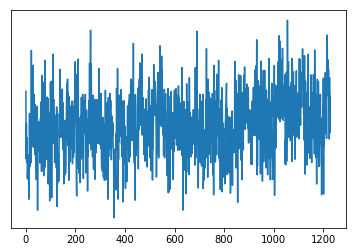

In [81]:
semilogy(ndata.std(1))

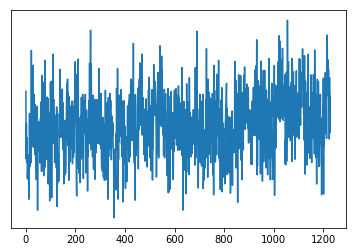

In [82]:
semilogy(ndata.std(1))

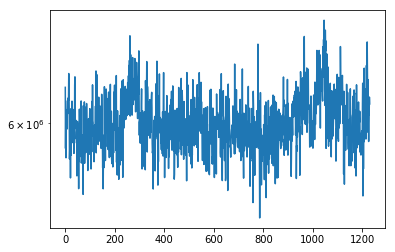

In [83]:
semilogy(msdata.std(1))

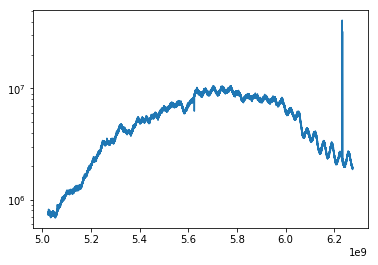

In [56]:
semilogy(freqs[mask], np.nanstd(msdata, 0))

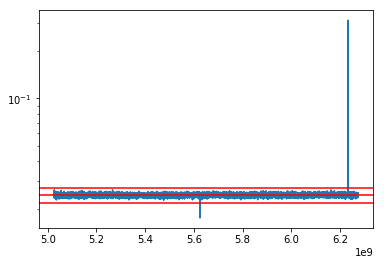

In [71]:
semilogy(freqs[mask], np.nanstd(xxoff, 0) / np.nanmean(xxoff, 0))
axhline(np.median(np.nanstd(xxoff, 0) / np.nanmean(xxoff, 0)), color='r')
axhline(np.median(np.nanstd(xxoff, 0) / np.nanmean(xxoff, 0)) + 0.0025, color='r')
axhline(np.median(np.nanstd(xxoff, 0) / np.nanmean(xxoff, 0)) - 0.0025, color='r')

In [77]:
bad = np.abs((np.nanstd(xxoff, 0) / np.nanmean(xxoff, 0)) - np.median(np.nanstd(xxoff, 0) / np.nanmean(xxoff, 0))) > (5. / 0.67449 * mad(np.nanstd(xxoff, 0) / np.nanmean(xxoff, 0)))

In [78]:
bad

array([False, False, False, ..., False, False, False], dtype=bool)

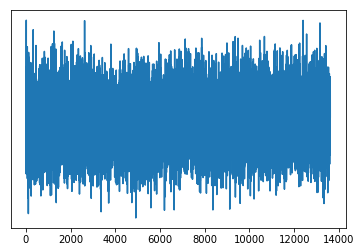

In [79]:
semilogy(np.nanstd(xxoff, 0)[~bad] / np.nanmean(xxoff, 0)[~bad])

In [70]:
5. / 0.67449 * mad(np.nanstd(xxoff, 0) / np.nanmean(xxoff, 0))

0.0025040728780510646

In [59]:
speck = np.nanmean((msdata**4), 0) / np.nanmean((msdata**2), 0)**2

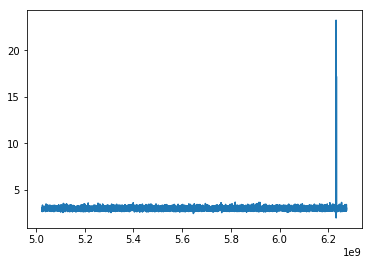

In [60]:
plot(freqs[mask], speck)

In [61]:
print np.median(speck)

2.98944


In [62]:
def mad(x, axis=None):
    return np.nanmedian(np.abs(x - np.nanmedian(x, axis)), axis)

In [63]:
print mad(speck)

0.0925331


In [64]:
5. / 0.67449 * mad(speck)

0.68594872846347332

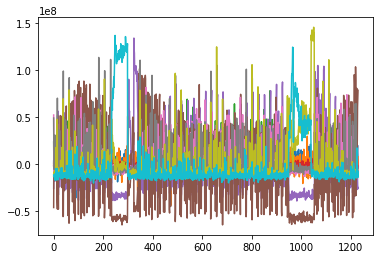

In [65]:
plot(msdata[:, np.abs(speck-np.median(speck)) > 0.686]);

In [69]:
print np.median(np.nanstd(xxoff, 0) / np.nanmean(xxoff, 0))

0.0243746


In [67]:
sigma = 1. / np.sqrt(1.5e9 / N * 0.02)
print sigma

0.0233694957869


In [68]:
np.median(np.nanstd(xxoff, 0) / np.nanmean(xxoff, 0)) / sigma

1.0430107740622774